In [1]:
import pandas as pd
import re
import numpy as np

import matplotlib.pyplot as plt

Duplicate key in file PosixPath('/home/mglee/.conda/envs/svmglee/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  NanumGothic')


In [24]:
t_data = pd.read_csv("../data/1theK (원더케이)_2020-07-01_2022-07-01_comment_info_0722.csv", lineterminator="\n")

In [43]:
data = t_data.iloc[:,1:]
data

,vidoeid,comment,comment_id,comment_time
0,ED9Vght5Rj0,티져까지 멋짐 뿜뿜이다,UgxNyr3WUDuLsVjA7Bd4AaABAg,2022-07-10T03:09:21Z
1,ED9Vght5Rj0,영탁님 감사합니다😀<br>영탁님 새롭게발전했네요,UgyJNL2pChd5OxlBbGh4AaABAg,2022-07-06T07:30:41Z
2,ED9Vght5Rj0,K - POP 🌟 Trot hwangje Young Tak 최고의젠틀 Man 👨 펜...,Ugz_0wNdEX3Bx4fN1sx4AaABAg,2022-07-06T03:13:39Z
3,ED9Vght5Rj0,욍대박나세요 ㆍ영탁님 목소리에 힘들어 도 찐으로💕💕💕💕💕👍👍👍 ㆍ즐겁습니다,UgyGBev8ODvlqUYRuop4AaABAg,2022-07-05T15:37:33Z
4,ED9Vght5Rj0,두분의 캐미가 뮤비를 한층 고급지게 하네요. 신사답게 춤도 넘 매력적이에오,Ugx7VNmpvtS9BLyQo3B4AaABAg,2022-07-05T05:10:40Z
...,...,...,...,...
445979,iN2EgMckDZA,I love thissssss,UgyfkIfWAQGAVR77O714AaABAg,2021-07-11T09:51:08Z
445980,iN2EgMckDZA,"Keep working, you have talent &lt;3",UgznPhcuBtMSSVnj_4l4AaABAg,2021-07-11T09:51:02Z
445981,iN2EgMckDZA,I just found this today omg and this is so goo...,Ugy_Gb8iPyF-Qgu7SKt4AaABAg,2021-07-11T09:50:51Z
445982,iN2EgMckDZA,Nasıl olur da her şarkısı muhteşem olur. Bayıl...,Ugypi6pWAbh_PE1902t4AaABAg,2021-07-11T09:48:03Z


In [44]:
from datetime import datetime
from time import strptime

data['comment_time'] = data['comment_time'].apply(lambda x : datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

In [52]:
y = []
m = []
d = []
h = []
for item in data['comment_time']:
    y.append(item.year)
    m.append(item.month)
    d.append(item.day)
    h.append(item.hour)

data['year'] = y
data['month'] = m
data['date'] =  d
data['hour'] = h

In [62]:
timeline = data.groupby(['month', 'date']).count().iloc[:,0]

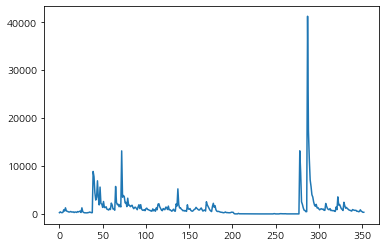

In [67]:
plt.plot(timeline.values)

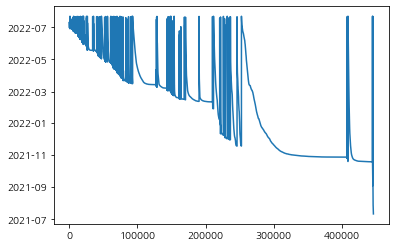

In [69]:
plt.plot(data['comment_time'])

In [15]:
def like_int(data):
    temp = []
    for like in data:
        unit = re.compile("[가-힇]+").findall(like)
        if unit == ['만']:
            like = float(like.replace(unit[0], ""))
            like *= 10000
        elif unit == ['천']:
            like = float(like.replace(unit[0], ""))
            like *= 1000
        else:
            like = float(like)
        
        temp.append(like)
            
    return temp

In [16]:
data['좋아요 개수'] = like_int(data['좋아요 개수'])

KeyError: '좋아요 개수'

In [8]:
data['좋아요 개수'].describe()

count      5125.000000
mean       1355.303610
std        8831.711938
min           0.000000
25%           1.000000
50%           3.000000
75%         165.000000
max      320000.000000
Name: 좋아요 개수, dtype: float64

In [9]:
data['좋아요 개수'].value_counts().sort_index()

0.0         653
1.0         793
2.0         863
3.0         380
4.0         192
           ... 
130000.0      2
150000.0      1
160000.0      1
190000.0      1
320000.0      1
Name: 좋아요 개수, Length: 720, dtype: int64

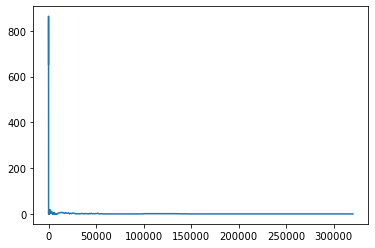

In [10]:
plt.plot(data['좋아요 개수'].value_counts().sort_index())
plt.show()

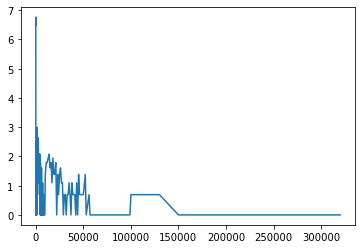

In [11]:
plt.plot(np.log(data['좋아요 개수'].value_counts().sort_index()))
plt.show()

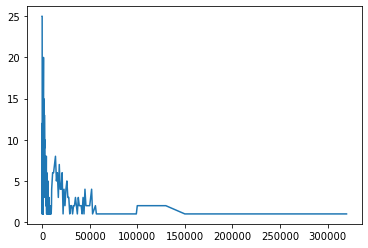

In [12]:
plt.plot(data['좋아요 개수'].value_counts().sort_index()[10:])
plt.show()